- **Tarea 3**: http://www.sc.ehu.es/sbweb/fisica3/fluidos/pelicula/pelicula.html. Haga un análisis numérico, usando sólo derivadas (e integrales) numéricas en la cual podamos modelar, el área de la película de jabón que se forma entre los extremos de dos aros de radio $r_1$ y $r_2$ separados una distancia $h$. Haga una rutina que permita ver los límites de este modelo. ¿Cuándo ya no se formará una película? ¿Bajo que condiciones?

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import scipy.integrate as spi
from IPython.display import Image
from matplotlib import rcParams
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
rcParams['legend.title_fontsize']= 'xx-large'
%matplotlib inline
#rcParams.keys()
import sympy as sp
from sympy import init_printing
init_printing(use_latex=True)
from sympy.utilities.lambdify import lambdify
import math 
from scipy.misc import derivative
import mpl_toolkits.mplot3d.axes3d as axes3d

<img width="60%" src="../figures/Superficie.png"/> 

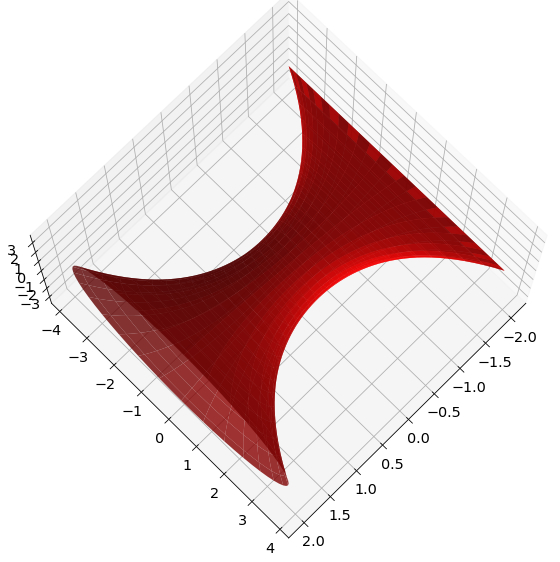

In [98]:
L=2
C1 = 1
C2 = 0
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

u = np.linspace(-L, L, 60)
v = np.linspace(0, 2*np.pi, 60)

U, V = np.meshgrid(u, v)
X=U
Y1 = C1*np.cosh((U+C2)/C1)*np.cos(V)
#Z1 = C1*np.sinh((U+C2)/C1)*np.sin(V)


ax.plot_surface(X, Y1, Z1, alpha=0.8, color='red')
ax.view_init(75,45)
#plt.draw()
plt.show()



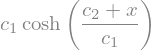

In [128]:
x = sp.Symbol('x')
c1 = sp.Symbol('c1')
c2 = sp.Symbol('c2')
y = c1*sp.cosh((x+c2)/c1)
y

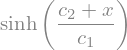

In [103]:
sp.diff(y,x)


Así, para el problema de valor en la frontera 
$y(0)=r$, $y(L)=R$
para $r=R$ tenemos que la función $y(x) =\cosh\left(\frac{x+c_2}{c_1}\right)$ tiene un radio mímimo de valor $a$ en $x=L/2$
Como $y'(x) = \sinh\left(\frac{x+c_2}{c_1}\right)=0$ implica $C_2 =-L/2$. En conclusión, $$y(x)=a\cosh\left(\frac{x-L/2}{a}\right)=a\cosh\left(\frac{x}{a}-\frac{L}{2a}\right)$$
Dividiendo la expresión anterior por $a$, y aplicando la condición de frontera para $y(0)=R$, obtenemos una relación entre el radio de los aros $R$, la separación entre los mismos $L$, y el radio mínimo de $a$. Así,

$$R=a\cosh\left(\frac{L}{2a}\right)$$
$$\frac{R}{a}=\cosh\left(\frac{L}{2a}\right)$$
$$\frac{L}{R}=2\frac{a}{R}\cosh^{-1}\left(\frac{R}{a}\right)$$


Llamando $x=a/R$, calculamos el máximo de la función $y=2x\cosh^{-1}(1/x)$.

El máximo de la relación a/R es:  1.3254562809094683


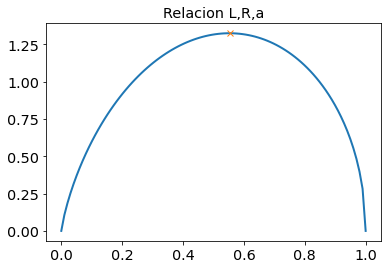

In [127]:
x= np.linspace(0.00001,1,100)
y = lambda x : 2*x*np.arccosh(1/x)
plt.title('Relacion L,R,a')
plt.plot(x,y(x))
plt.plot(x[pd.Series(y(x)).idxmax()],np.max(y(x)),'x');
print('El máximo de la relación a/R es: ', np.max(y(x)))

De lo anterior se concluye lo siguiente. Si los radios de los aros son iguales de magnitud $R$, la longitud máxima de separación $L$ entre los dos aros debe satisfacer la siguiente relación
$$ \frac{L}{R}\leq 1.3254562809094683$$

Por lo tanto, si  la distancia entre los dos aros $L> 1.3254562809094683*R$ no es posible formar una película de jabonosa.

### Calculemos el valor del punto crítico para la función $y=2x\cosh^{-1}(1/x)$, igualando a cero la derivada, $dy/dx=0$.

In [150]:
Y = 2*x*sp.acosh(1/x)
dydx = lambdify(x,sp.diff(Y,x))  
df = lambdify(x,sp.diff(Y,x,2)) 

In [140]:
import scipy.optimize as op

In [151]:
raiz = op.newton(dydx,0.51,fprime=df,tol=1.e-6,maxiter=100)       
print(raiz)

0.5524341245308833


## Hallemos los puntos críticos de $y$, resolviendo $y'=0$

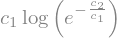

In [153]:
sp.solve(sp.diff(y,x),x)[1]